In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("Advertising-Copy1.csv")

In [12]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
df.shape

(200, 4)

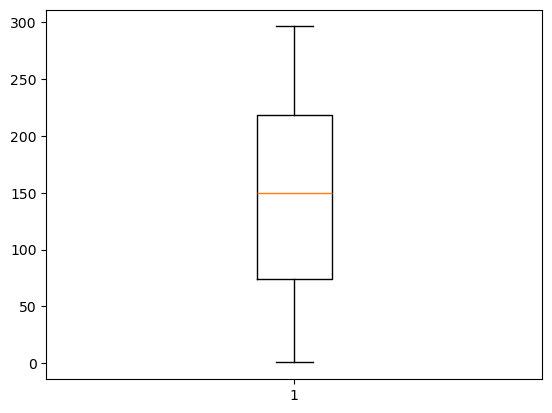

In [17]:
plt.boxplot(data = df,x = df['TV'])
plt.show()

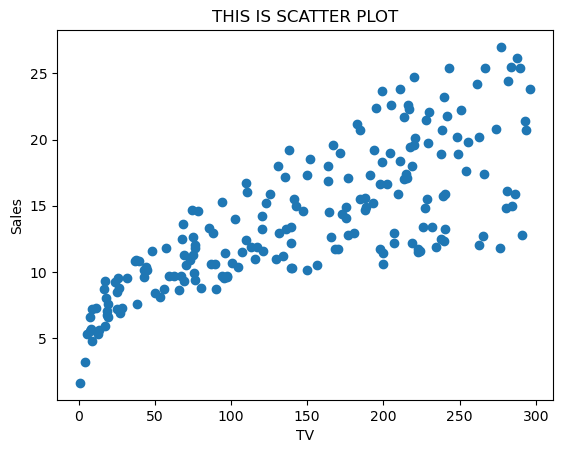

In [19]:
plt.scatter(x=df['TV'],y=df['sales'])
plt.title("THIS IS SCATTER PLOT")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

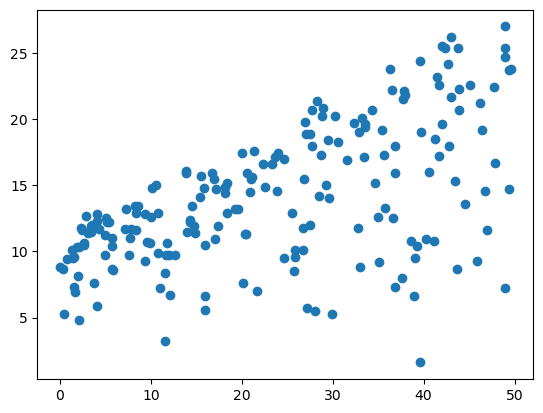

In [20]:
plt.scatter(x=df['radio'],y=df['sales'])
plt.show()

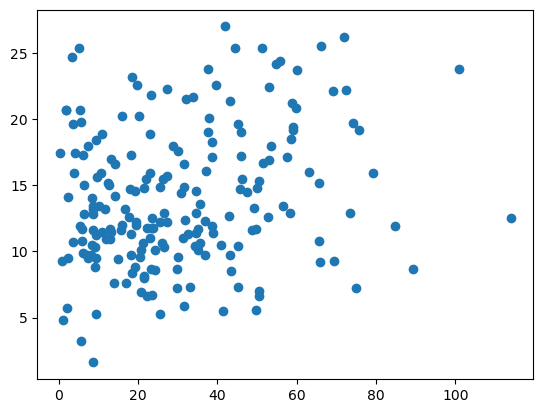

In [21]:
plt.scatter(x=df['newspaper'],y=df['sales'])
plt.show()

In [22]:
x = df[['TV','radio','newspaper']]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y =df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 42)

In [29]:
x_train

,TV,radio,newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [30]:
y_train

114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 150, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
model

LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
predictions=model.predict(x_test)

In [40]:
model.coef_

array([0.04543356, 0.19145654, 0.00256809])

In [41]:
predictions

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

In [42]:
result=pd.DataFrame({"Actual":y_test,"Predicted": predictions,"Difference": y_test-predictions})

In [43]:
result

,Actual,Predicted,Difference
95,16.9,16.383482,0.516518
15,22.4,20.924350,1.475650
30,21.4,21.614954,-0.214954
158,7.3,10.490700,-3.190700
128,24.7,22.176905,2.523095
115,12.6,13.026681,-0.426681
69,22.3,21.103093,1.196907
170,8.4,7.318130,1.081870
174,11.5,13.567321,-2.067321
45,14.9,15.122386,-0.222386


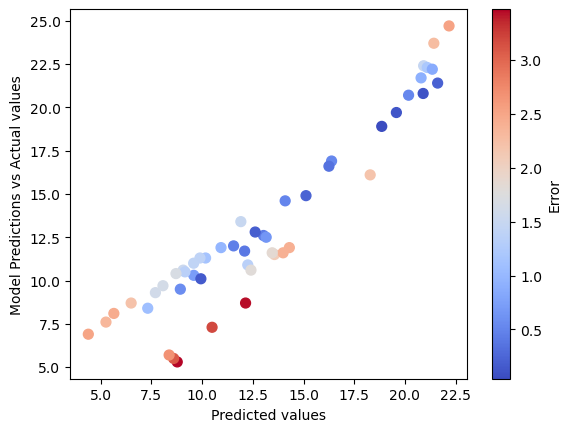

In [44]:
error = np.abs(predictions - y_test)
plt.scatter(predictions , y_test , c =error , cmap = 'coolwarm' , s= 50)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.ylabel('Model Predictions vs Actual values')
plt.colorbar(label = 'Error')
plt.show()
           